In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")


In [19]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
valor_medio_esperado_na_previsao = housing['MedHouseVal'].mean()

In [21]:
valor_medio_esperado_na_previsao

2.068558169089147

In [23]:
squared_erros = pd.Series(valor_medio_esperado_na_previsao - housing['MedHouseVal'])**2
SSE = np.sum(squared_erros)
print(f"Soma dos Quadrados dos Erros (SSE:) {SSE}")

Soma dos Quadrados dos Erros (SSE:) 27483.19819368851


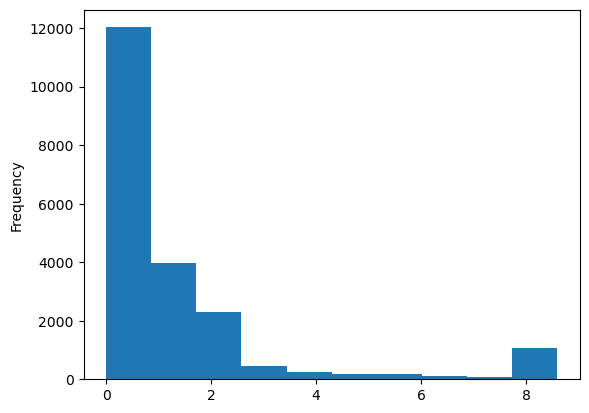

In [25]:
hist_plot = squared_erros.plot(kind='hist')

In [33]:
print(f'Resultado Numpy para Std: {np.std(housing.MedInc)}')

Resultado Numpy para Std: 1.899775694574878


In [34]:
from scipy.stats.stats import pearsonr

print(f'Correlação via PearsonR do ScipY: {pearsonr(housing.MedInc, housing.MedHouseVal)[0]}')

Correlação via PearsonR do ScipY: 0.6880752079585479


In [35]:
x_range = [housing['MedInc'].min(), housing['MedInc'].max()]
y_range = [housing['MedHouseVal'].min(), housing['MedHouseVal'].max()]

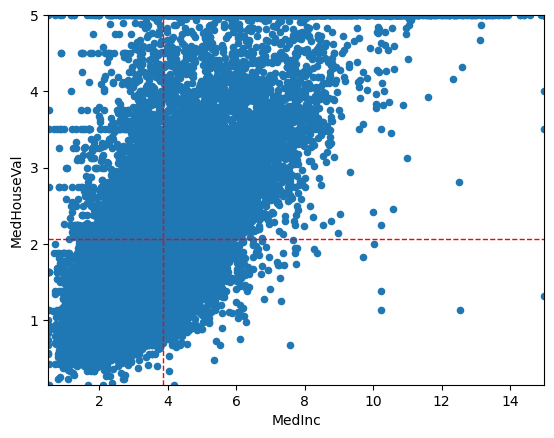

In [38]:
scatter_plot = housing.plot(kind='scatter', x = 'MedInc', y = 'MedHouseVal', xlim = x_range, ylim = y_range)

meanY = scatter_plot.plot(x_range, [housing['MedHouseVal'].mean(), housing['MedHouseVal'].mean()], '--', color = "red", linewidth = 1)
meanX = scatter_plot.plot([housing['MedInc'].mean(), housing['MedInc'].mean()], y_range, '--', color = 'red', linewidth=1)

In [39]:
import statsmodels.api as sm

In [45]:
y = housing['MedHouseVal']
x = housing['MedInc']

In [46]:
x = sm.add_constant(x)

In [47]:
x.head()

,const,MedInc
0,1.0,8.3252
1,1.0,8.3014
2,1.0,7.2574
3,1.0,5.6431
4,1.0,3.8462


In [48]:
modelo = sm.OLS(y, x)

modelo_v1 = modelo.fit()

In [49]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        06:28:09   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

In [50]:
print(modelo_v1.params)

const     0.450856
MedInc    0.417938
dtype: float64


In [51]:
valores_previsto = modelo_v1.predict(x)
valores_previsto

0        3.930277
1        3.920330
2        3.484003
3        2.809324
4        2.058331
           ...   
20635    1.102965
20636    1.519441
20637    1.161351
20638    1.231231
20639    1.449144
Length: 20640, dtype: float64

In [55]:
MedInc = 7
Xp = np.array([1, MedInc])

print(f'Se MedInc = {MedInc}, nosso modelo prevê Preço mediano de Casa de {modelo_v1.predict(Xp)}')

Se MedInc = 7, nosso modelo prevê Preço mediano de Casa de [3.37642521]


In [56]:
x_range = [housing['MedInc'].min(), housing['MedInc'].max()]
y_range = [housing['MedHouseVal'].min(), housing['MedHouseVal'].max()]

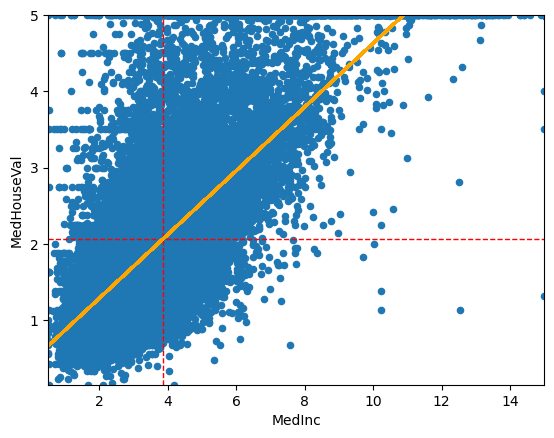

In [59]:
scatter_plot = housing.plot(kind = 'scatter', x = 'MedInc', y = 'MedHouseVal', xlim = x_range, ylim = y_range)

meanY = scatter_plot.plot(x_range, [housing['MedHouseVal'].mean(), housing['MedHouseVal'].mean()], '--', color = 'red', linewidth=1)
meanX = scatter_plot.plot([housing['MedInc'].mean(), housing['MedInc'].mean()], y_range, '--', color = 'red', linewidth=1)

regression_line = scatter_plot.plot(housing['MedInc'], valores_previsto, '-', color = 'orange', linewidth = 2)

In [65]:
from sklearn.preprocessing import StandardScaler

objeto = StandardScaler()

residuos = housing['MedHouseVal'] - valores_previsto
residuos_normal = objeto.fit_transform(residuos.values.reshape(-1, 1))


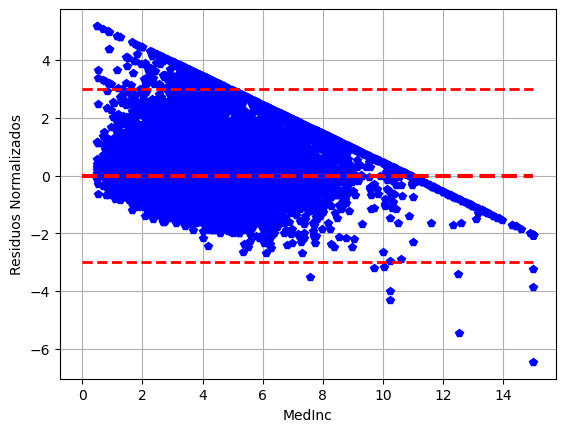

In [66]:
residual_scatter = plt.plot(housing['MedInc'], residuos_normal, 'bp')
plt.xlabel('MedInc')
plt.ylabel('Residuos Normalizados')
mean_residual = plt.plot([int(x_range[0]), round(x_range[1],0)], [0,0], '--', color = 'red', linewidth= 3)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1],0)], [3,3], '--', color='red', linewidth=2)
lower_bond = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color='red', linewidth=2)
plt.grid()

In [67]:
from sklearn import linear_model

In [69]:
modelo_v2 = linear_model.LinearRegression(fit_intercept=True)

In [70]:
num_observ = len(housing)
x = housing['MedInc'].values.reshape((num_observ, 1))
y = housing['MedHouseVal'].values

In [71]:
type(x)

numpy.ndarray

In [73]:
np.ndim(x)

2

In [74]:
print(x)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [1.7   ]
 [1.8672]
 [2.3886]]


In [75]:
type(y)

numpy.ndarray

In [76]:
np.ndim(y)

1

In [77]:
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [78]:
modelo_v2.fit(x,y)

LinearRegression()

In [79]:
print(modelo_v2.coef_)
print(modelo_v2.intercept_)

[0.41793849]
0.4508557670326794


In [80]:
print(modelo_v2.predict(x))

[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]


In [84]:
MedInc = 7
#Xp = np.array(MedInc)
Xp = np.array(MedInc).reshape(-1, 1)
print(f'Se MedInc = {MedInc}, modelo preve Preço mediano da Casa de {modelo_v2.predict(Xp)}')

Se MedInc = 7, modelo preve Preço mediano da Casa de [3.37642521]


In [86]:
from sklearn.datasets import make_regression

HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)

In [87]:
%%time

sk_lr = linear_model.LinearRegression(fit_intercept=True)
sk_lr.fit(HX, Hy)

CPU times: total: 547 ms
Wall time: 248 ms


LinearRegression()

In [88]:
%%time

sm_lr = sm.OLS(Hy, sm.add_constant(HX))
sm_lr.fit()

CPU times: total: 1.88 s
Wall time: 879 ms
